輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以高雄市立委趙天麟為例，建立發文文字斷詞表

In [3]:
chao = fb[fb.page_name == "趙天麟"]
chao.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
1910,109004835824305_2132255086832593,109004835824305,趙天麟,政治人物,【奇聞共享】\n\n「茲因市長人氣居高不下，市府已然成為本市另類的觀光景點，建請觀光局研議於本府四維行政中心1樓中庭設置市長人形立牌供參觀合影，並提供本市各觀光景點宣傳折頁與消費優惠訊息，以提升觀光效益。」\n\n#猜猜看這會是誰在什麼場合的發言\n\n#謝謝李雅慧議員的法案助理宛廷認真準備質詢內容時的發現,NaN,photo,https://www.facebook.com/109004835824305/posts/2132255086832593/,2019-01-15T08:43:50+0000,2019-01-15T16:43:50,...,NaN,NaN,292,0,0,0,0,0,79,23


In [4]:
chao['new_date'] = pd.to_datetime(chao['created_time_taipei']).dt.date
chao['month_year'] = pd.to_datetime(chao['new_date']).dt.to_period('M')
chao.head(1)

<ipython-input-4-a0a7047fdc27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chao['new_date'] = pd.to_datetime(chao['created_time_taipei']).dt.date
<ipython-input-4-a0a7047fdc27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chao['month_year'] = pd.to_datetime(chao['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
1910,109004835824305_2132255086832593,109004835824305,趙天麟,政治人物,【奇聞共享】\n\n「茲因市長人氣居高不下，市府已然成為本市另類的觀光景點，建請觀光局研議於本府四維行政中心1樓中庭設置市長人形立牌供參觀合影，並提供本市各觀光景點宣傳折頁與消費優惠訊息，以提升觀光效益。」\n\n#猜猜看這會是誰在什麼場合的發言\n\n#謝謝李雅慧議員的法案助理宛廷認真準備質詢內容時的發現,NaN,photo,https://www.facebook.com/109004835824305/posts/2132255086832593/,2019-01-15T08:43:50+0000,2019-01-15T16:43:50,...,292,0,0,0,0,0,79,23,2019-01-15,2019-01


In [5]:
# 依照按讚數 低到高排序
chao = chao.sort_values(by=['like_count'])
# 用新的排序當作順序
chao.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [6]:
doc_names = range(len(chao)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 613)

In [7]:
chao = chao.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(chao['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [9]:
# 先看第一個
words = jieba.lcut(text_list[1], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.645 seconds.
Prefix dict has been built succesfully.


['「', '親子', '共讀', '要', '從', '幾歲', '開始', '呀', '？', '」', '\n', '「', '我', '的', '孩子', '根本', '坐不住', '要', '怎麼', '親子', '共讀', '？', '」', '\n', '\n', '國民', '健康', '署', '明天', '中午', '12', '點', '30', '分來', '為', '大家', '解惑', '\n', '請鎖定', '👉', 'https', ':', '/', '/', 'pse', '.', 'is', '/', 'G6UFJ', '\n', '\n', '#', '加碼', '抽獎', '活動', '\n', '#', '親子', '共讀']


In [10]:
words = jieba.cut(text_list[1], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000001EA8F6474A0>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [30]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
chao_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
chao_docs['jieba_results'] = chao_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍👉📢👩📌💼]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    chao_docs = chao_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [31]:
chao_docs.iloc[400:,]  #從讚數最多的檢查

,jieba_results
400,父與子 姊 與 弟 ❤ 前金 教會子 母室 實在 溫馨
401,我 的 天團 團隊 助理 群 能量 破表 你們 是 我 最強 大 的 夥伴 與 動能
402,刷 一波春聯 密切 鎖定 選前 最後一 波春聯 發送 行程 選前 黃 金 天 我 的 團隊 為 我 安排 了 密密麻麻 的 拜票 掃街 行程 跑過 公里 的 超馬 立委 來 了 我要 用 超人 般的 意志 跑過 鼓山 鹽埕 前金 新興 苓雅 的 每 一個 大街小巷 我們 一定 會贏 邁向 勝選 天 一定 要 出來 投票 用 得票 數在 高雄 寫 歷史 照片 要點 開來 看 高雄 衝百萬 八席 全上 台灣 要贏
403,天氣 放晴 了 現在 出門 正是 時候 大家 一起 來 看看 前段 時間 陳 明文 委員 向 天麟 請 教 如何 成為 馬拉松 選手 的 影片 🏃 🏃 🏃 陳 明文 委員 立下 今年 要 跑 馬拉松 的 目標 喔 我們 一起 來 幫 他 加油 👀
404,孩子 的 未來 高雄 的 未來 台灣 的 未來 天麟 邀請 大家 明天 下午 一點 半 一起 來 參加 《 台灣 大遊行 這次 的遊 行路 線 全部 都 集中 在 天麟 的 選區 天麟 特別 在 沿線 設置 四大 加油 打氣 站 並且 邀請 四大 類別 的 藝文團體 沿線 為 遊行民眾 加油 第一 個 加油 打氣 站 在 民權 五福 路口 我 特別 邀請 魔幻 氣球屋 的 祥 寶 哥哥 為 小朋友 製 作 造型 氣球 讓 大家 可以 裝 扮得 更活 潑 第二 個 加油 打氣 站 在 中央公園 旁 現場 安排 搖滾 熊 啦 啦 隊 舞蹈 藝能團 舞蹈 小 公主 霏霏 帶來 精彩 的 舞蹈 為民眾 鼓舞 第三 個 加油 打氣 站 在 五福 路橋 旁 是 威鴻戰 鼓 用振奮 人心 的 鼓聲 助陣 遊行 的 熱度 第四 個 加油 打氣 站 在 終點 公園 路 及 大義 街口 有 台灣 之光 盛祥門祥 獅獻瑞 為 圓滿 達陣 的 遊行 隊伍 畫上 美麗 的 句點 為確 保民 眾遊行 安全 我 特別 商請志 工救 災大隊 率領 專業 醫護 人員 投入 醫護 站 服務 來確 保民 眾 安全 明天 就是 我們 要 一起 走出 來 展現 高雄人 的 意志 讓 世界 聽到 高雄 的 聲音
...,...
608,謝謝 今天 所有 出席 的 真 勇者 真 勇者 說 的 不僅僅 是 今天 特地 從台 中到 高雄 為 我 助選 的 陳柏惟 說 的 不僅僅 是 今天 站 在 台上 的 高雄市 議員 們 更是 今天 前金 新興 所有 的 後援會 會長 總幹事 副會長 們 他們 很多 人 都 是 現任 里長 在 市政府 換黨 執政下 他們 具名 並且 願意 站 出來 支持 我 他們 也 是 真 勇者 我 也 要 特別 感謝 管碧玲 委員 我們 的 管媽 她 是 一個 有 智慧 有氣度 的 長 者 由於 選區 合 併 她 在 今年 月 率先 宣布 放棄 連任 讓 天麟 可以 提早 經營 選區 相信 管媽 要 以 豐富 的 選戰 經驗 帶領 我們 翻 轉高雄 打出 一場 漂亮 的 勝仗 陳柏惟 在 台上 看到 現場 這麼 多 市民 朋友 的 熱情 流下 了 英雄 淚 陳柏惟 說 天麟 有 強大 意志力 天麟 是 一個 馬拉松 跑者 我 挑戰 公里 超級 馬拉松 我要 做到 的 事情 一定 會 做到 文益 議員 說 天麟 的 選舉 很 正向 都 在 傳遞 正 能量 不 攻擊別 人 不 做 負面 文宣 今年 這場 選戰 讓 天麟 想起 年前 的 自己 當時 我 的 競選 對 手 是 邱毅 大家 都 叫 他 爆料 天王 是 一個 強勁 的 對 手 天麟 當時 決定 參選 立委 宣布 不 參選 議員 連任 全力 輔選 我們 這區 的 市 議員 讓 我們 民進黨 在 年 的 議會 選舉 在 第 選區 揮出 全壘 打 也 感謝 建盟 議員 等 夥伴 全力 輔選 讓 天麟 挑戰 成功 為 了 紮 根基 層 提供 最 接地 氣的 服務 天麟 推動 跟 里長 設立 聯合 服務處 過去 天麟 在 前 新苓 共同 建立 將近 個 聯合 服務處 也 跟 各區 的 資深 里長 一起 合作 培育 了 許許 多多 的 新 好 里長 我們 也 從 這些 跟 里長 合作 完成 許多 選民服務 也 爭取 到 不少 重大 建設 除了 貼近 選民 提供 優質 服務 外 天麟 在 立法院 歷任 衛環委員會 內 政委 員會 及 外交國防委員會 並 擔任 召委 也 被 公督盟 評為 優秀 立委 天麟 重視 國際 事務及 兩岸 議題 曾應 美國 國務院 之 邀訪問 研究 並到 日本 慶應 大學 就 國際 事務及 兩岸 問題 交換 意見 跟 學習 同時 天麟 也 曾 在 民進黨 中央黨部 擔任 過青 年部 主任 新聞部 主任 以及 小英總統 擔任 黨主席 後 兩任 中國 事務部 主任 用 國際 角度看 台海 問題 全力 協助 蔡 總統 建立 國際 及 兩岸 論述 在 離 選戰 倒數 天之際 天麟 依舊 堅守 在 外交國防委員會 捍衛 戰機 的 預算及 強化 國安 的 法案 替 小英總統 完成 抗 中保 台 的 任務 天麟 也 要 特別 感謝 許多 好 朋友 出席 永達兄 特地 來 支持 我 蔡昌達 前 副 議長 特別 來 關心 我 的 選情 後援 總會 許文欽 總會長 是 我永遠 的 後 盾 後援 總會 總幹事 陳 福明 協助 今天 的 所有 一切 更要 感謝 前金 後援會 會長 賴勇村 及 新興 後援會 會長 謝國 男 所 組織 的 後援會 系統 今天 距離 選舉 還有 最 後 天 台灣 要贏 高雄 一定 要大贏 高雄 第六 選區 如果 大贏 高雄市 就 可以 八仙 過海 立委 通通 過關 拜託 大家 跟 著 天麟 一起 衝 最 後 天 我們 一直 衝 一起 衝 一人拉 一票 台 中 第二 選區 陳柏惟 感謝 管媽 哥 特別 感謝 蕭永達 出席 記得 我們 的 微笑 手勢 謝謝邁 家人 天粉 出任 務志工 夥伴 感 謝 製 作 天 麟 手 舉 牌 氣 氛 超 好 陳柏惟 管碧玲 萬事 發達 蔡昌達 煥然 一新 簡煥宗 益起 打拚 黃 文益 主婦 政治 力 李雅慧 鳳山 要紅 林智鴻 高雄市 議員 鄭孟 洳 高雄市 議員 郭建盟 江瑞鴻 李喬如 黃 秋 媖 高雄市 議員 蕭永達
609,經過 了 年 的 努力 壽山 自然 公園 籌備 處 終於 以 國家 自然 公園 管理 處 正式 揭牌 成立 國家 公園 是 台灣 重要 的 生態 標記 但屬 於 淺山型 的 都 會 山區 與 公園 卻 無法 在 國家 公園 與 一般 社區 公園 做出 區隔 年 內政部 擘 畫出 國家 自然 公園 這個 層級 在 當時 的 高雄市 長 陳菊 花媽 爭取 下 籌組 了 壽山 自然 公園 籌備 處 經過 管碧玲 委員 及 天麟 先 後 在內 政委 員會 的 多年 爭取 內政部 徐國勇 部長 勇 於 任事 突破 萬難 終在 蔡英文 總統 與 蘇貞昌院長 的 力 挺 下 結束 長達 年 的 籌備 正式 誕生 包括 壽山 柴山 龜山 半屏山 等 都 會 淺山 加上 高雄 都 會 公園 台中 都 會 公園 都 納入 國家 自然 公園 管理 處 的 管轄範圍 未來 服務 與 研究 的 量 能 都將 大大 提升 是民眾 與 生態 的 一大 福音 親自 見證 這歷史 的 時刻 備感 欣慰 未來 讓 我們 一起 加油
610,奇蹟似的 放晴 了 個 大小朋友 的 感動 仲夏夜 的 序曲 兒童 歡樂 的 笑 聲 第九年 的 高雄樂活節 我們 從 鼓山區 開始 選區整併 後 鼓山 鹽埕 苓雅 前金 新興 變成 一個 大家庭 這是 我 首次 邀請 紙風車劇團 來 到 鼓山區 美麗 的 中山國小 是 我 獻給 鼓山區 的 小朋友 開學 的 第一 個大禮 首先 要 感謝 天父爸爸 連日 的 下雨 在 今天 奇 蹟 式 的 放晴 了 因為 天父爸爸 是 最 疼 愛 小朋友 的 會 讓 超過 位大 朋友 小朋友 在 最舒服 的 天氣 下欣賞 表演 感謝 中山國小 蕭木川 校長 提供 這麼 好 的 場地給 大家 一個 美麗 的 夜晚 過去 蕭木川 校長 在 文府國小 服務 時 我 也 同樣 邀請 過 紙風車劇團 在 文府國小 演出 蕭校 長 跟 我 說 美麗 的 家長 會長 黃 小姐 一直 希望 中山國小 的 小朋友 鼓山區 的 小朋友 也 可以 享受 到 這麼 優質 的 表演 所以 跟 校長 報告 我們 完成 了 這個 期待 我們 要 獻給 大家 的 禮物 的 不 只 這些 龍水里 新任 的 初學霖 里長 及 簡煥宗 議員 李喬如 議員 告訴 我 中山國小 是 周邊 里民 學童 重要 的 運動場所 希望 我能 幫 他們 爭取 預算 重整 綜合 運動場所 我 也 向 大家 報告 我 爭取 到 教育部 的 專案 補助 萬 完成 這個 任務 感謝 一直 陪著 我們 完成 夢想 的 橄欖枝 基金 會 也 特別 感謝 李泰宗 柯珀 汝 董事 對 紙風車 的 支持 他們 長期 資助 紙風車 讓 這麼 優質 的 表演 可以 一直 下去 因為 有 你 們 才 會 有 今晚 的 活動 我 發起 的 高雄樂活節 已經 連續 九年 的 時間 在 苓雅 前金 新興區 帶來 無數個 表演 給 苓雅 前金 新興 的 小朋友 今年 開始 我們 要 讓 鼓山 鹽埕 區的 小朋友 第一哩路 就 從 藝術 開始 最 後 我要 借用 各位 的 雙手 給 紙風車 一個

In [32]:
chao['jieba_results'] = chao_docs
chao_post = chao[['new_date','message','jieba_results','like_count']]
chao_post

,new_date,message,jieba_results,like_count
0,2019-08-10,,,29
1,2019-06-18,「親子共讀要從幾歲開始呀？」\n「我的孩子根本坐不住要怎麼親子共讀？」\n\n國民健康署明天中午12點30分來為大家解惑\n請鎖定👉https://pse.is/G6UFJ\n\n#加碼抽獎活動\n#親子共讀,親子 共讀 要 從 幾歲 開始 呀 我 的 孩子 根本 坐不住 要 怎麼 親子 共讀 國民 健康 署 明天 中午 點 分來 為 大家 解惑 請鎖定 加碼 抽獎 活動 親子 共讀,70
2,2019-01-03,,,84
3,2019-01-24,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,雅慧 議員 當選 後 首次 直播 朋友 們 一起 來 為 星願 烏克麗麗樂團 加油,122
4,2019-04-18,🎥直播預告21:00\n如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場智慧財產的震撼！\n\n『盜版影片三不原則』：不看！不點！不散播！\n一起堅持看正版，讓本週日的精采大結局留下完美的句點！\n\n稍後21:00，天麟邀請到幾位朋友，他們正是『與惡』距離最近的一群人，有在追劇的朋友一起來聊聊真實的人生劇場吧。\n\n#這個時間我與餓也滿近的 😜\nhttps://reurl.cc/pK9W8,🎥 直播 預告 如果 說 今天 的 大 地震 嚇了 你 一 跳 那麼 重量 級 優質 國片 被 盜版 洩漏 就 更是 一場 智慧 財產 的 震撼 盜版 影片 三 不 原則 不看 不點 不 散播 一起 堅持 看 正版 讓 本 週日 的 精采 大結局 留下 完美 的 句點 稍 後 天麟 邀請 到 幾位 朋友 他們 正是 與 惡 距離 最近 的 一群 人 有 在 追劇 的 朋友 一起 來 聊聊 真實 的 人生 劇場 吧 這個 時間 我 與 餓 也 滿近 的 😜,150
...,...,...,...,...
608,2019-10-26,#謝謝今天所有出席的真勇者\n\n真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不僅僅是今天站在台上的高雄市議員們，更是今天前金、新興所有的後援會會長、總幹事、副會長們，他們很多人都是現任里長，在市政府換黨執政下，他們具名並且願意站出來支持我，他們也是真勇者。\n\n我也要特別感謝管碧玲委員，我們的管媽，她是一個有智慧，有氣度的長者，由於選區合併，她在今年3月率先宣布放棄連任，讓天麟可以提早經營選區。相信管媽要以豐富的選戰經驗，帶領我們翻轉高雄，打出一場漂亮的勝仗。\n\n陳柏惟在台上，看到現場這麼多市民朋友的熱情，流下了英雄淚，陳柏惟說天麟有強大意志力，天麟是一個馬拉松跑者，我挑戰100公里超級馬拉松，我要做到的事情一定會做到。\n\n文益議員說天麟的選舉很正向，都在傳遞正能量，不攻擊別人，不做負面文宣。今年這場選戰，讓天麟想起9年前的自己。當時我的競選對手是邱毅，大家都叫他「爆料天王」，是一個強勁的對手。天麟當時決定參選立委，宣布不參選議員連任，全力輔選我們這區的市議員，讓我們民進黨在2010年的議會選舉，在第8選區揮出全壘打。也感謝建盟議員等夥伴，全力輔選，讓天麟挑戰成功。\n\n為了紮根基層，提供最接地氣的服務，天麟推動跟里長設立「聯合服務處」。過去天麟在前新苓共同建立將近100個聯合服務處，也跟各區的資深里長一起合作，培育了許許多多的新好里長。我們也從這些跟里長合作完成許多選民服務，也爭取到不少重大建設。\n \n除了貼近選民，提供優質服務外，天麟在立法院歷任衛環委員會、內政委員會及外交國防委員會，並擔任召委，也被公督盟評為優秀立委。天麟重視國際事務及兩岸議題，曾應美國國務院之邀訪問研究，並到日本慶應大學就國際事務及兩岸問題交換意見跟學習。同時，天麟也曾在民進黨中央黨部擔任過青年部主任、新聞部主任以及小英總統擔任黨主席後兩任中國事務部主任，用國際角度看台海問題，全力協助蔡總統建立國際及兩岸論述。在離選戰倒數78天之際，天麟依舊堅守在外交國防委員會，捍衛F16V戰機的預算及強化國安的法案，替小英總統完成抗中保台的任務。\n \n天麟也要特別感謝許多好朋友出席，永達兄特地來支持我，蔡昌達前副議長特別來關心我的選情，後援總會許文欽總會長是我永遠的後盾，後援總會總幹事陳福明協助今天的所有一切，更要感謝前金後援會會長賴勇村及新興後援會會長謝國男所組織的後援會系統。今天距離選舉還有最後77天，台灣要贏，高雄一定要大贏，高雄第六選區如果大贏，高雄市就可以八仙過海，立委通通過關，拜託大家，跟著天麟一起衝，最後77天，我們一直衝！一起衝！\n\n#一人拉一票台中第二選區陳柏惟\n#感謝管媽3Q哥\n#特別感謝蕭永達出席\n#記得我們的微笑手勢\n#謝謝邁家人TaiwanTeam天粉出任務志工夥伴\n#感謝製作天麟手舉牌氣氛超好\n\n3Q 陳柏惟\n管碧玲 (kuanbiling)\n萬事發達蔡昌達\n煥然一新 簡煥宗\n益起打拚－黃文益\n主婦政治力 李雅慧\n鳳山要紅 林智鴻\n高雄市議員鄭孟洳\n高雄市議員郭建盟\n江瑞鴻\n李喬如\n黃秋媖 高雄市議員\n蕭永達,謝謝 今天 所有 出席 的 真 勇者 真 勇者 說 的 不僅僅 是 今天 特地 從台 中到 高雄 為 我 助選 的 陳柏惟 說 的 不僅僅 是 今天 站 在 台上 的 高雄市 議員 們 更是 今天 前金 新興 所有 的 後援會 會長 總幹事 副會長 們 他們 很多 人 都 是 現任 里長 在 市政府 換黨 執政下 他們 具名 並且 願意 站 出來 支持 我 他們 也 是 真 勇者 我 也 要 特別 感謝 管碧玲 委員 我們 的 管媽 她 是 一個 有 智慧 有氣度 的 長 者 由於 選區 合 併 她 在 今年 月 率先 宣布 放棄 連任 讓 天麟 可以 提早 經營 選區 相信 管媽 要 以 豐富 的 選戰 經驗 帶領 我們 翻 轉高雄 打出 一場 漂亮 的 勝仗 陳柏惟 在 台上 看到 現場 這麼 多 市民 朋友 的 熱情 流下 了 英雄 淚 陳柏惟 說 天麟 有 強大 意志力 天麟 是 一個 馬拉松 跑者 我 挑戰 公里 超級 馬拉松 我要 做到 的 事情 一定 會 做到 文益 議員 說 天麟 的 選舉 很 正向 都 在 傳遞 正 能量 不 攻擊別 人 不 做 負面 文宣 今年 這場 選戰 讓 天麟 想起 年前 的 自己 當時 我 的 競選 對 手 是 邱毅 大家 都 叫 他 爆料 天王 是 一個 強勁 的 對 手 天麟 當時 決定 參選 立委 宣布 不 參選 議員 連任 全力 輔選 我們 這區 的 市 議員 讓 我們 民進黨 在 年 的 議會 選舉 在 第 選區 揮出 全壘 打 也 感謝 建盟 議員 等 夥伴 全力 輔選 讓 天麟 挑戰 成功 為 了 紮 根基 層 提供 最 接地 氣的 服務 天麟 推動 跟 里長 設立 聯合 服務處 過去 天麟 在 前 新苓 共同 建立 將近 個 聯合 服務處 也 跟 各區 的 資深 里長 一起 合作 培育 了 許許 多多 的 新 好 里長 我們 也 從 這些 跟 里長 合作 完成 許多 選民服務 也 爭取 到 不少 重大 建設 除了 貼近 選民 提供 優質 服務 外 天麟 在 立法院 歷任 衛環委員會 內 政委 員會 及 外交國防委員會 並 擔任 召委 也 被 公督盟 評為 優秀 立委 天麟 重視 國際 事務及 兩岸 議題 曾應 美國 國務院 之 邀訪問 研究 並到 日本 慶應 大學 就 國際 事務及 兩岸 問題 交換 意見 跟 學習 同時 天麟 也 曾 在 民進黨 中央黨部 擔任 過青 年部 主任 新聞部 主任 以及 小英總統 擔任 黨主席 後 兩任 中國 事務部 主任 用 國際 角度看 台海 問題 全力 協助 蔡 總統 建立 國際 及 兩岸 論述 在 離 選戰 倒數 天之際 天麟 依舊 堅守 在 外交國防委員會 捍衛 戰機 的 預算及 強化 國安 的 法案 替 小英總統 完成 抗 中保 台 的 任務 天麟 也 要 特別 感謝 許多 好 朋友 出席 永達兄 特地 來 支持 我 蔡昌達 前 副 議長 特別 來 關心 我 的 選情 後援 總會 許文欽 總會長 是 我永遠 的 後 盾 後援 總會 總幹事 陳 福明 協助 今天 的 所有 一切 更要 感謝 前金 後援會 會長 賴勇村 及 新興 後援會 會長 謝國 男 所 組織 的 後援會 系統 今天 距離 選舉 還有 最 後 天 台灣 要贏 高雄 一定 要大贏 高雄 第六 選區 如果 大贏 高雄市 就 可以 八仙 過海 立委 通通 過關 拜託 大家 跟 著 天麟 一起 衝 最 後 天 我們 一直 衝 一起 衝 一人拉 一票 台 中 第二 選區 陳柏惟 感謝 管媽 哥 特別 感謝 蕭永達 出席 記得 我們 的 微笑 手勢 謝謝邁 家人 天粉 出任 務志工 夥伴 感 謝 製 作 天 麟 手 舉 牌 氣 氛 超 好 陳柏惟 管碧玲 萬事 發達 蔡昌達 煥然 一新 簡煥宗 益起 打拚 黃 文益 主婦 政治 力 李雅慧 鳳山 要紅 林智鴻 高雄市 議員 鄭孟 洳 高雄市 議員 郭建盟 江瑞鴻 李喬如 黃 秋 媖 高雄市 議員 蕭永達,19978
609,2019-11-28,經過了8年的努力，「壽山自然公園籌備處」終於以「國家自然公園管理處」正式揭牌成立！\n\n「國家公園」是台灣重要的生態標記，但屬於淺山型的都會山區與公園，卻無法在國家公園與一般社區公園做出區隔。2011年內政部擘畫出「

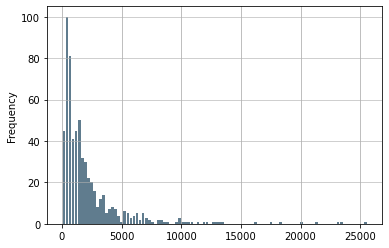

In [33]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = chao_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [34]:
temp = chao_post[(chao_post['like_count'] <= 5000) & (chao_post['like_count'] > 1500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
349,2019-03-11,3/14白色情人節💑\n還沒準備好情人節大餐嗎？天麟幫你準備好囉！\n\n▫️活動辦法\n即刻起，至3/13 20:00截止，Po上一張比愛心的照片，讚最多的前三名，可獲得睦工場浪漫情人節雙人套餐🌹✨\n快找親朋好友一起參加活動幫你按讚喔！\n\n▫️活動截止時間\n將於3/13晚上天麟會直播公布前三名幸運得主喔！\n⚠️直播也會有加碼活動，記得上線加入我們喔～\n（小提醒：追直播前，記得先加入趙天麟的官方line喔）\n🔍 @skychao （記得加@唷！）\n\n▫️特別感謝本次活動配合店家 睦工場\n位於新選區充滿歷史氛圍人文薈萃的鹽埕區，餐廳裝潢採文青工業風，深受年輕人喜愛，餐點高貴不貴更是CP值💯\n#以後天麟會繼續分享更多高雄美食給大家喔\n\n（大餐使用時間為3/14晚餐，若無法當天參與活動，請告知，將把資格留給下一位朋友喔）,白色 情人 節 💑 還沒 準備 好 情人 節 大餐 嗎 天麟 幫 你 準備 好 囉 ▫ 活動 辦法 即刻起 至 截止 上 一張 比愛心 的 照片 讚 最 多 的 前三名 可獲 得 睦 工場 浪漫 情人 節雙人 套餐 🌹 快 找 親朋 好友 一起 參加 活動 幫 你 按 讚 喔 ▫ 活動 截止 時間 將於 晚上 天麟會 直播 公布 前三名 幸運 得主 喔 ⚠ 直播 也 會 有加 碼 活動 記得 上線 加入 我們 喔 小 提醒 追 直播 前 記得 先 加入 趙天麟 的 官方 喔 🔍 @ 記得加 @ 唷 ▫ 特別 感謝 本次 活動 配合 店家 睦 工場 位 於 新 選區 充滿 歷史 氛圍 人文 薈萃 的 鹽埕 區 餐廳 裝潢 採文 青工 業風 深受 年輕人 喜愛 餐點 高貴 不貴 更是 值 💯 以後天麟會 繼續 分享 更多 高雄 美食 給 大家 喔 大餐 使用 時間 為 晚餐 若無法 當天 參與 活動 請 告知 將把 資格 留給 下 一位 朋友 喔 ）,1505
350,2019-08-01,2019高雄樂活節開跑🙌🏻\n\n陪伴大小朋友的樂活節又要登場囉！\n9年來，不曾缺席仲夏時光的樂活節，今年依舊滿滿的精彩節目和大家一起同樂！\n\n準備好了嗎？我們8/31準備從鼓山區中山國小出發囉～\n\n讓我們一起種下希望，我們都是藝家人💕\n\n#紙風車劇團\n#星願烏克麗麗\n#良山兄,高雄樂活節 開跑 🙌 🏻 陪伴 大小朋友 的 樂 活節 又 要 登場 囉 年來 不曾 缺席 仲夏 時光 的 樂 活節 今年 依舊 滿滿 的 精彩 節目 和 大家 一起 同樂 準備 好 了 嗎 我們 準備 從 鼓山區 中山國小 出發 囉 讓 我們 一起 種下 希望 我們 都 是 藝 家人 💕 紙風車劇團 星願 烏克麗麗 良山兄,1505
351,2019-10-22,"#國家音樂廳等級訪日巡演行前音樂會演奏搶先聽\n\n「高雄YMCA慕恩室內樂團」即將在10/28前往日本巡演，天麟很榮幸受邀擔任榮譽領隊。\n\n我特別邀請音樂家們到小天地Skyland舉辦行前音樂會。「台日經貿文化交流協會」張瑞雄理事長擔任領隊，促成訪日五場巡演，希望以室內樂展現「台灣之美」，分享給日本社會和大學校園，拓展台灣和日本音樂藝術、文化交流。\n\n男高音：熊飛熊 (團長)\n小提琴：洪寅洲 (音樂總監/美國伊斯曼音樂學院小提琴博士)\n小提琴：林宇欣 (鋼琴/國立嘉義大學音樂系碩士)\n中提琴：王瀅卿 (美國密蘇里州立大學演奏博士)\n大提琴：朱亞涵 (國立中山大學音樂系碩士)\n\n#行前音樂會曲目\n\n【莫札特歌劇選粹「序曲-選自費加洛婚禮」/ W. A. Mozart「Overture, from Marriage of Figaro」5’】\n「費加洛婚禮」（Le Nozze di Figaro）是莫札特於1786所完成的喜歌劇， 也是生涯中最傑出的三部歌劇之一。首演在1784年4月於巴黎，即獲得極高的評價。\n\n【四月望雨幻想曲 13 / Che-Yi Lee「 Raining in April Fantasy」】\n台灣歌謠的老前輩鄧雨賢創作， 其創作「四季紅」、「月夜愁」、「望春風」、「雨夜花」四首最為經典，後人合稱為「四月望雨」， 同時有著台灣歌謠之父的美譽。\n\n【《弦舞》8’】\n本曲於2008年4月「國家交響樂團─NSO首席絃樂團」成立音樂會中首演，而後改編成為數種不同編制版本演出。以電子舞曲節奏為表現風格，樂曲間各聲部的獨奏樂段，有如搖滾樂中不同樂器的獨奏表現，各聲部之間也有精彩的對話，發揮不同的效果。台灣新銳作曲家李哲藝因此曲榮獲第二十三屆金曲獎，最佳作曲人獎項。\n\n【蘭陽舞曲」/ Che-Yi Lee「 Lan-Yang Folk Dance」3’】\n這是一首耳熟能詳的臺灣民謠，其創作原由和起源地，眾說紛紜。較廣為人所傳的，為記載宜蘭地區人民，搭乘」火車過山洞」山洞中滴水的聲音滴-滴-答-答-，人們近鄉情怯內心的喜悅，轉變口中哼出的宜蘭調而成宜蘭童謠。\n鑒於本曲的特性，編曲者重新賦予舞曲的特色，以弦樂團重新詮釋，全曲多用五度和聲，藉由其特殊的音響效果產生龐大的空間感，好似火車過山洞時的聲響，為本曲增添身歷其境的效果。\n\n【安可曲-莫札特歌劇選粹「夜后-選自魔笛」/ W. A. Mozart「The Queen of the Night, from Magic Flute」3.5’】\n莫札特 於1791年譜寫出人生最後一齣歌劇「魔笛」（Die Zauberflöte），首演即獲得空前的迴響，成為莫札特最傑出的三部歌劇其中之一。全劇當中，「夜后」一角完全展現花腔女高音異常人的神奇唱腔 來提升全劇的張力表現與戲劇效果，非常高音域聲音的極致魅力來緊緊抓住觀眾的喜愛","國家 音樂廳 等級 訪日 巡演 行前 音樂會 演奏 搶先 聽 高雄 慕恩室 內樂團 即將 在 前往 日本 巡演 天麟 很榮幸 受邀 擔任 榮譽 領隊 我 特別 邀請 音樂家們 到 小天地 舉辦 行前 音樂會 台日 經貿 文化交流 協會 張瑞雄 理事長 擔任 領隊 促成 訪日 五場 巡演 希望 以室 內樂展現 台灣 之美 分享 給 日本社 會 和 大學 校園 拓展 台灣 和 日本 音樂 藝術 文化交流 男高音 熊飛熊 團長 小提琴 洪寅洲 音樂 總監 美國 伊斯曼 音樂學院 小提琴 博士 小提琴 林宇欣 鋼琴 國立 嘉義 大學 音樂系 碩士 中提琴 王瀅卿 美國密 蘇里 州立 大學 演奏 博士 大提琴 朱亞涵 國立 中山大學 音樂系 碩士 行前 音樂會 曲目 莫札特 歌劇 選粹 序曲 選自費 加洛婚禮 , ’ 費加洛 婚禮 是 莫札特 於 所 完成 的 喜 歌劇 也 是 生涯 中 最傑 出 的 三部 歌劇 之一 首演 在 年 月 於 巴黎 即 獲得 極高 的 評價 四月 望雨 幻想曲 台灣 歌謠 的 老 前輩 鄧雨賢 創作 其 創作 四季 紅 月夜 愁 望春風 雨夜 花 四首 最為 經典 後 人合稱 為 四月 望雨 同時 有 著 台灣 歌謠 之父 的 美譽 《 弦 舞 ’ 本曲 於 年 月 國家 交響樂團 ─ 首席 絃 樂團 成立 音樂會 中 首演 而 後 改編 成為 數種 不同 編制 版本 演出 以電子 舞曲 節奏 為 表現 風格 樂曲間 各聲部 的 獨奏樂段 有如 搖滾樂 中 不同 樂器 的 獨 奏表 現 各聲 部之間 也 有 精彩 的 對 話 發揮 不同 的 效果 台灣 新銳 作曲家 李哲藝 因此 曲榮 獲 第二十三 屆 金曲獎 最佳 作曲 人獎 項 蘭陽 舞曲 ’ 這是 一首 耳熟 能詳 的 臺灣 民謠 其 創作 原由 和 起源地 眾說 紛紜 較廣為 人 所傳 的 為 記載 宜蘭 地區 人民 搭乘 火車過 山洞 山洞 中 滴水 的 聲音 滴 滴 答 答 人們 近鄉 情怯 內心 的 喜悅 轉變 口中 哼 出 的 宜蘭調 而 成宜蘭 童謠 鑒 於 本曲 的 特性 編 曲者 重新 賦予 舞曲 的 特色 以弦樂團 重新 詮釋 全曲 多用 五度 和 聲 藉由 其 特殊 的 音響 效果 產生 龐大 的 空間 感 好似 火車過 山洞 時 的 聲響 為 本曲 增添 身歷 其境 的 效果 安可曲 莫札特 歌劇 選粹 夜后 選自魔 笛 , ’ 莫札特 於 年 譜 寫 出 人生 最後一 齣 歌劇 魔笛 ö 首演 即 獲得 空前 的 迴響 成為 莫札特 最傑 出 的 三部 歌劇 其中 之一 全劇 當中 夜后 一角 完全 展現 花腔 女高音 異 常人 的 神奇 唱腔 來 提升 全劇 的 張 力表 現與 戲劇 效果 非常 高 音域 聲音 的 極致 魅力 來 緊緊 抓住 觀眾 的 喜 愛",1512
352,2019-12-14,型男市長林智堅陪同天麟參加粉絲見面會，騎腳踏車遊哈瑪星風靡粉絲，替天麟拉票！\n\n今天我很好的朋友，也是我學習的對象，他跟我一樣是六年級生，從助理出身，經過民主的洗禮，擔任議員、市長，他用改變政治文化的方式，給下一代的孩子帶來幸福，一點一點突破市民的信任，得到無數次評鑑正面的評價，讓新竹成為幸福城市。他就是新竹市長林智堅。\n\n新竹是高科技新貴的聚集地，是最年輕，出生率最高的城市，市長也以身作則，有三個小寶貝，不僅如此，更是六年級生的模範典範。我要謝謝他，在選舉剩下28天，來幫我助選加油，還有來到現場的粉絲，謝謝你們，我們一起預約了高雄的未來，高雄未來要像新竹一樣，又年輕、又富有，具有前瞻性，讓我們一起努力，朝著目標前進。\n\n林智堅

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [35]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [36]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [37]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一些,一份,一位,一來,一個,一個橋,一切,一刻,一劑,...,鼓聲,鼓舞,齊心,齊聚,齊過,龍子,龍水里,龍頭,龐大,龔薩福
0,0.0,0.0,0.0,0.076548,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.048003,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
195,0.0,0.0,0.0,0.000000,0.0,0.062234,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10055,0.0,0.0,0.0,0.0,0.000000,0.0
196,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0
197,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0


In [38]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['孩子', '總統', '台灣', '高雄', '希望', '大家', '小天地', '天麟', '我們', '一起']
TOP 10 WORDS PER TOPIC #1
['大家', '後援會', '高雄', '鹽埕', '趙天麟', '感謝', '天麟', '一起', '我們', '議員']
TOP 10 WORDS PER TOPIC #2
['國家', '高雄', '大家', '夜市', '今天', '一起', '我們', '總統', '天麟', '台灣']
TOP 10 WORDS PER TOPIC #3
['議員', '加油', '高雄市', '感謝', '苓雅', '台灣', '天麟', '一起', '高雄', '我們']
TOP 10 WORDS PER TOPIC #4
['一起', '大家', '蔡英文', '高雄', '可以', '自由民主永續之旅', '天麟', '總統', '台灣', '我們']


In [39]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['加油', '我們', '立委', '出來', '一起', '倒數', '總統', '天麟', '高雄', '阿諾']
TOP 10 WORDS PER TOPIC #1
['高雄', '天麟', '台灣', '大家', '加油', '鼓山區', '小天地', '感謝', '我們', '一起']
TOP 10 WORDS PER TOPIC #2
['大家', '小天地', '阿諾', '總統', '一起', '蔡英文', '分享', '直播', '自由民主永續之旅', '台灣']
TOP 10 WORDS PER TOPIC #3
['高雄市', '支持', '一起', '高雄', '總統', '苓雅', '天麟', '趙天麟', '議員', '我們']
TOP 10 WORDS PER TOPIC #4
['台灣', '國小', '努力', '活動', '今天', '生日', '一起', '天麟', '行程', '我們']


In [40]:
#政見做斷詞

politics_chao = politics[politics.姓名 == "趙 天 麟"].政見.to_string()
politics_chao = re.sub(re_punctuation, "", politics_chao)
politics_chao = re.sub(r'[0-9]','',politics_chao)
politics_chao = re.sub(r'[a-zA-Z]','',politics_chao)
politics_chao = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_chao)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_chao, cut_all = False)


In [41]:
# 比較、查看他政見
promise = politics[politics.姓名 == "趙 天 麟"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['66    產業的高雄－創新引資，經濟躍昇，亞洲新灣區將成為南台灣產業轉型的領頭羊 1.傳統優勢產業升級 2.新興潛力產業培力 環境的高雄－綠能、低碳、減汙染 1.推動高雄市成為亞洲氫能城市願景',
 '2.溫室氣體減量，持續推動空污法總量管制及「室內空氣品質管理法」',
 '健康的高雄－運動、醫療不能少 1.主辦世界級馬拉松賽事',
 '2.推動成立「亞洲熱帶醫療研究中心」',
 '文化的高雄－仲夏親子藝文，年年樂活不間斷；古蹟重生，活絡文化內涵 1.連年舉辦「仲夏樂活節」，讓親子藝文活動深入社區基層',
 '2.歷史古蹟「逍遙園」重生，結合地方文史團隊活化古蹟內涵',
 '3.活化利用舊市議會建築主體',
 '世代安心的高雄－完備各世代照護服務 1.修正「財務劃分法」，讓高雄財政更健全',
 '2.修正「勞工保險條例」，保障勞工老年生活沒煩惱',
 '3.幼兒教育券向下延伸至2歲，減輕父母負擔',
 '4.推動社區長照據點，修正「長照保險法」',
 '建設的高雄－輕軌、鐵路地下化陸續上路，健全公共路網運輸 1.輕軌串連捷運，健全公共路網交通',
 '2.加速推動鐵路地下化，結合捷運與輕軌，提供更好轉乘服務。']

In [42]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_chao, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [47]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=5, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-8:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['空污法', '舉辦', '團隊', '地方', '世代', '公共', '捷運', '輕軌']
TOP 10 WORDS PER TOPIC #1
['勞工保險條例', '深入', '主體', '長照保險法', '陸續', '內涵', '產業', '服務']
TOP 10 WORDS PER TOPIC #2
['仲夏樂活節', '願景', '照護', '提供', '社區', '結合', '鐵路地下化', '推動']
TOP 10 WORDS PER TOPIC #3
['加速', '氣體', '活絡', '親子', '活化', '修正', '健全', '高雄']
TOP 10 WORDS PER TOPIC #4
['文史', '財務劃分法', '成立', '路網', '藝文', '成為', '重生', '文化']


In [48]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

空污法, 舉辦, 團隊, 地方, 世代, 公共, 捷運, 輕軌, 勞工保險條例, 深入, 主體, 長照保險法, 陸續, 內涵, 產業, 服務, 仲夏樂活節, 願景, 照護, 提供, 社區, 結合, 鐵路地下化, 推動, 加速, 氣體, 活絡, 親子, 活化, 修正, 健全, 高雄, 文史, 財務劃分法, 成立, 路網, 藝文, 成為, 重生, 文化, 

In [50]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'空污法': 1,
         '舉辦': 1,
         '團隊': 1,
         '地方': 1,
         '世代': 1,
         '公共': 1,
         '捷運': 1,
         '輕軌': 1,
         '勞工保險條例': 1,
         '深入': 1,
         '主體': 1,
         '長照保險法': 1,
         '陸續': 1,
         '內涵': 1,
         '產業': 1,
         '服務': 1,
         '仲夏樂活節': 1,
         '願景': 1,
         '照護': 1,
         '提供': 1,
         '社區': 1,
         '結合': 1,
         '鐵路地下化': 1,
         '推動': 1,
         '加速': 1,
         '氣體': 1,
         '活絡': 1,
         '親子': 1,
         '活化': 1,
         '修正': 1,
         '健全': 1,
         '高雄': 6,
         '文史': 1,
         '財務劃分法': 1,
         '成立': 1,
         '路網': 1,
         '藝文': 1,
         '成為': 1,
         '重生': 1,
         '文化': 1,
         '孩子': 1,
         '總統': 3,
         '台灣': 4,
         '希望': 1,
         '大家': 4,
         '小天地': 1,
         '天麟': 5,
         '我們': 5,
         '一起': 5,
         '後援會': 1,
         '鹽埕': 1,
         '趙天麟': 1,
         '感謝': 2,
         '議員': 2,
        

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [51]:
top_10_message = tfidf_view.sort_values(by = ['高雄'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['高雄'], ascending = False).head(10)

,一下,一些,一份,一位,一來,一個,一個橋,一切,一刻,一劑,...,鼓聲,鼓舞,齊心,齊聚,齊過,龍子,龍水里,龍頭,龐大,龔薩福
153,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
121,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
164,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
150,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
127,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
144,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
117,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
14,0.064431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.074923,0.0,0.0,0.0,0.0,0.0


In [52]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[153,]).sort_values(by = 153, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,153
舞蹈,0.518077
高雄,0.297297
加油,0.239773
上陣,0.186159
青春活力,0.186159
...,...
小處,0.000000
小葉,0.000000
小英總統,0.000000
小英,0.000000


In [53]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

179         聊聊天
180         奮戰到
181          出廠
182          回報
183          假日
184          戰隊
185         小天地
186          服務
187    自由民主永續之旅
188         馬拉松
189         紙風車
190          夜市
191          我們
192        政治獻金
193          夜市
194    自由民主永續之旅
195          台灣
196         全代會
197          壓迫
198    博正兒童發展中心
Name: term, dtype: object

In [54]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="博正兒童發展中心"]

,一下,一些,一份,一位,一來,一個,一個橋,一切,一刻,一劑,...,鼓舞,齊心,齊聚,齊過,龍子,龍水里,龍頭,龐大,龔薩福,term
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,博正兒童發展中心


In [55]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[198,]

new_date                                                                                                                                                                                                                                                                                                                    2019-11-06
message                                                                                     上禮拜來自博正兒童發展中心的慢飛天使們👼🏻，一起到小天地參觀「希望」作品，也體驗無敵海景球池同樂，小朋友玩得不亦樂乎！\n天麟也邀請到造型甜點達人Susan 老師來教小朋友製作糖霜餅乾，讓小朋友在小天地畫餅乾帶回家和家人一起分享💚\n\n身為三個寶貝的爸爸，孩子們健康快樂的成長，是天麟一直以來最大的願望。我曾在衛環委員會8個會期的時間，努力為孩子們爭取社會福利以及把關食安。\n\n慢飛天使需要更多的鼓勵和陪伴，讓我們一起為孩子們加油👼🏻💪🏻\n\n博正兒童發展中心
jieba_results     上禮 拜 來 自 博正兒童發展中心 的 慢飛天使 們 👼 🏻 一起 到 小天地 參觀 希望 作品 也 體驗 無敵 海景 球池 同樂 小朋友 玩得 不亦樂乎 天麟 也 邀請 到 造型 甜點 達 人  老師 來 教 小朋友 製 作 糖霜 餅乾 讓 小朋友 在 小天地 畫餅 乾帶 回家 和 家人 一起 分享 💚 身為 三個 寶貝 的 爸爸 孩子 們 健康 快樂 的 成長 是 天麟 一直 以來 最大 的 願望  我 曾 在 衛環委員會  個會期 的 時間 努力 為 孩子 們 爭取 社會福利 以及 把關食安  慢飛天使 需要 更 多 的 鼓勵 和 陪伴 讓 我們 一起 為 孩子 們 加油 👼 🏻  🏻 博正兒童發展中心
like_count         

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [56]:
message_newtfidf[message_newtfidf['term']=="自由民主永續之旅"]

,一下,一些,一份,一位,一來,一個,一個橋,一切,一刻,一劑,...,鼓舞,齊心,齊聚,齊過,龍子,龍水里,龍頭,龐大,龔薩福,term
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,自由民主永續之旅
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,自由民主永續之旅
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,自由民主永續之旅


In [57]:
temp.iloc[12,]

new_date                                                                                                                                          2019-07-22
message                        蔡英文 Tsai Ing-wen總統任內最長時間（12天），頗具外交突破的「自由民主永續之旅」圓滿完成。在幻象2000戰鬥機的伴飛中，返抵國門！感謝臉友們的熱情支持與鼓勵！\n\n#紐約海地聖克里斯多福及尼維斯聖文森聖露西亞丹佛\n#自由民主永續之旅
jieba_results     蔡英文     總統 任內 最長 時間  天 頗 具 外交 突破 的 自由民主永續之旅 圓滿 完成  在 幻象  戰鬥機 的 伴飛 中 返抵 國門 感謝 臉友們 的 熱情 支持 與 鼓勵  紐約 海地 聖 克里斯多 福及 尼維斯 聖文森 聖 露西 亞 丹佛  自由民主永續之旅
like_count                                                                                                                                              1561
Name: 361, dtype: object

In [59]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['加油', '我們', '立委', '出來', '一起', '倒數', '總統', '天麟', '高雄', '阿諾']
TOP 10 WORDS PER TOPIC #1
['高雄', '天麟', '台灣', '大家', '加油', '鼓山區', '小天地', '感謝', '我們', '一起']
TOP 10 WORDS PER TOPIC #2
['大家', '小天地', '阿諾', '總統', '一起', '蔡英文', '分享', '直播', '自由民主永續之旅', '台灣']
TOP 10 WORDS PER TOPIC #3
['高雄市', '支持', '一起', '高雄', '總統', '苓雅', '天麟', '趙天麟', '議員', '我們']
TOP 10 WORDS PER TOPIC #4
['台灣', '國小', '努力', '活動', '今天', '生日', '一起', '天麟', '行程', '我們']


In [60]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
349,2019-03-11,白色 情人 節 💑 還沒 準備 好 情人 節 大餐 嗎 天麟 幫 你 準備 好 囉 ▫ 活動 辦法 即刻起 至 截止 上 一張 比愛心 的 照片 讚 最 多 的 前三名 可獲 得 睦 工場 浪漫 情人 節雙人 套餐 🌹 快 找 親朋 好友 一起 參加 活動 幫 你 按 讚 喔 ▫ 活動 截止 時間 將於 晚上 天麟會 直播 公布 前三名 幸運 得主 喔 ⚠ 直播 也 會 有加 碼 活動 記得 上線 加入 我們 喔 小 提醒 追 直播 前 記得 先 加入 趙天麟 的 官方 喔 🔍 @ 記得加 @ 唷 ▫ 特別 感謝 本次 活動 配合 店家 睦 工場 位 於 新 選區 充滿 歷史 氛圍 人文 薈萃 的 鹽埕 區 餐廳 裝潢 採文 青工 業風 深受 年輕人 喜愛 餐點 高貴 不貴 更是 值 💯 以後天麟會 繼續 分享 更多 高雄 美食 給 大家 喔 大餐 使用 時間 為 晚餐 若無法 當天 參與 活動 請 告知 將把 資格 留給 下 一位 朋友 喔 ）
350,2019-08-01,高雄樂活節 開跑 🙌 🏻 陪伴 大小朋友 的 樂 活節 又 要 登場 囉 年來 不曾 缺席 仲夏 時光 的 樂 活節 今年 依舊 滿滿 的 精彩 節目 和 大家 一起 同樂 準備 好 了 嗎 我們 準備 從 鼓山區 中山國小 出發 囉 讓 我們 一起 種下 希望 我們 都 是 藝 家人 💕 紙風車劇團 星願 烏克麗麗 良山兄
351,2019-10-22,"國家 音樂廳 等級 訪日 巡演 行前 音樂會 演奏 搶先 聽 高雄 慕恩室 內樂團 即將 在 前往 日本 巡演 天麟 很榮幸 受邀 擔任 榮譽 領隊 我 特別 邀請 音樂家們 到 小天地 舉辦 行前 音樂會 台日 經貿 文化交流 協會 張瑞雄 理事長 擔任 領隊 促成 訪日 五場 巡演 希望 以室 內樂展現 台灣 之美 分享 給 日本社 會 和 大學 校園 拓展 台灣 和 日本 音樂 藝術 文化交流 男高音 熊飛熊 團長 小提琴 洪寅洲 音樂 總監 美國 伊斯曼 音樂學院 小提琴 博士 小提琴 林宇欣 鋼琴 國立 嘉義 大學 音樂系 碩士 中提琴 王瀅卿 美國密 蘇里 州立 大學 演奏 博士 大提琴 朱亞涵 國立 中山大學 音樂系 碩士 行前 音樂會 曲目 莫札特 歌劇 選粹 序曲 選自費 加洛婚禮 , ’ 費加洛 婚禮 是 莫札特 於 所 完成 的 喜 歌劇 也 是 生涯 中 最傑 出 的 三部 歌劇 之一 首演 在 年 月 於 巴黎 即 獲得 極高 的 評價 四月 望雨 幻想曲 台灣 歌謠 的 老 前輩 鄧雨賢 創作 其 創作 四季 紅 月夜 愁 望春風 雨夜 花 四首 最為 經典 後 人合稱 為 四月 望雨 同時 有 著 台灣 歌謠 之父 的 美譽 《 弦 舞 ’ 本曲 於 年 月 國家 交響樂團 ─ 首席 絃 樂團 成立 音樂會 中 首演 而 後 改編 成為 數種 不同 編制 版本 演出 以電子 舞曲 節奏 為 表現 風格 樂曲間 各聲部 的 獨奏樂段 有如 搖滾樂 中 不同 樂器 的 獨 奏表 現 各聲 部之間 也 有 精彩 的 對 話 發揮 不同 的 效果 台灣 新銳 作曲家 李哲藝 因此 曲榮 獲 第二十三 屆 金曲獎 最佳 作曲 人獎 項 蘭陽 舞曲 ’ 這是 一首 耳熟 能詳 的 臺灣 民謠 其 創作 原由 和 起源地 眾說 紛紜 較廣為 人 所傳 的 為 記載 宜蘭 地區 人民 搭乘 火車過 山洞 山洞 中 滴水 的 聲音 滴 滴 答 答 人們 近鄉 情怯 內心 的 喜悅 轉變 口中 哼 出 的 宜蘭調 而 成宜蘭 童謠 鑒 於 本曲 的 特性 編 曲者 重新 賦予 舞曲 的 特色 以弦樂團 重新 詮釋 全曲 多用 五度 和 聲 藉由 其 特殊 的 音響 效果 產生 龐大 的 空間 感 好似 火車過 山洞 時 的 聲響 為 本曲 增添 身歷 其境 的 效果 安可曲 莫札特 歌劇 選粹 夜后 選自魔 笛 , ’ 莫札特 於 年 譜 寫 出 人生 最後一 齣 歌劇 魔笛 ö 首演 即 獲得 空前 的 迴響 成為 莫札特 最傑 出 的 三部 歌劇 其中 之一 全劇 當中 夜后 一角 完全 展現 花腔 女高音 異 常人 的 神奇 唱腔 來 提升 全劇 的 張 力表 現與 戲劇 效果 非常 高 音域 聲音 的 極致 魅力 來 緊緊 抓住 觀眾 的 喜 愛"
352,2019-12-14,型 男市 長 林智堅 陪同 天麟 參加 粉絲見 面會 騎腳 踏車遊 哈瑪星 風靡 粉絲 替天麟 拉票 今天 我 很 好 的 朋友 也 是 我 學習 的 對象 他 跟 我 一樣 是 六年 級生 從 助理 出身 經過 民主 的 洗禮 擔任 議員 市長 他用 改變 政治 文化 的 方式 給 下一代 的 孩子 帶來 幸福 一點 一點 突破 市民 的 信任 得到 無數次 評鑑 正面 的 評價 讓 新竹 成為 幸福 城市 他 就是 新竹市 長 林智堅 新竹 是 高科技 新貴 的 聚集地 是 最 年 輕 出生率 最高 的 城市 市長 也 以身 作則 有三個 小寶貝 不僅 如此 更是 六年 級生 的 模範典範 我要 謝謝 他 在 選舉 剩下 天 來 幫 我 助選 加油 還有 來 到 現場 的 粉絲 謝謝 你 們 我們 一起 預約 了 高雄 的 未來 高雄 未來 要 像 新竹 一樣 又 年 輕 又 富有 具有 前瞻性 讓 我們 一起 努力 朝著 目標 前進 林智 堅市 長 說 他 已經 七 八年 沒來 哈瑪星 今天 有幸 舊地 重遊 還參觀 了 現在 火紅 的 網紅勝地 小天地 及 期待已久 的 無敵 海景 球池 看到 許多 小朋友 在 球 池裡 歡樂 玩樂時 非常 感動 希望 未來 選舉 活動 可以 以 小天地 為例 在 歡樂 的 嘉年 華裡 讓 親子 一起 了解 政策 理念 這與 一樣 是 三寶爸 的 我 有 相同 的 理念 從過 去 就 透過 親子 藝文 活動 的 方式 來 宣傳 政治理念 試圖 改變 選舉 文化 兩人 都 希望 選舉 是 一場 沒 有 謾 罵 有 討論 政策 牛肉 的 嘉年華 最後謝 謝智 堅市 長 撥 空來 參加 年 輕媽媽 年 輕粉 絲 的 見 面會 及 高雄 漂亮 媽咪俱樂部 的 親子 義賣 也 希望 今天 把 這場 民主 嘉年華 獻給 大家 讓 我們 一起 為 台灣 努力 為 高雄 奮鬥 更 多 合照 在 這裡
353,2019-06-15,恭喜 美鳳 姐姐 在 高雄 的 時候 粉絲 專頁 正式 超越 萬
...,...,...
543,2019-07-11,天 的 自由民主永續之旅 出發 第一線 的 外交 打拚 第一手 的 成果 見證 自由民主永續之旅
544,2019-07-20,自由民主永續之旅 回程 過境 美國 丹佛 蔡英文 是 中華民國 有史 以來 第一位 造訪 科羅拉多州 的 總統 科羅拉多州 與 丹佛市 台灣 僑胞 不 多 但 原訂 人 的 僑宴 擠進 了 位 全美 各地 開車 搭機 前來 的 僑胞 為 台灣 總統 蔡英文 加油 我 在 簡短致詞 時 為 許多 希望 我代為 發聲 的 台灣 年輕人 表達 了 強烈 的 訊息 我們 熱愛我們 的 國家 強力 支持 台灣 支持 中華民國 一個 擁有 民主自由 與 堅持 普世價值 的 國家 也 因此 強烈 支持 捍衛著 這些 價值 的 國家 領導人 蔡英文 感動 的 夜晚 共享 台灣 的 價值 值得 紀念 與 守護 科羅拉多州州長 參議員 眾議員 齊聚 一堂 見證 這次 的 外交 突破 感謝 僑胞們 不辭 辛勞前 來 好多 高雄 鄉親 喔 天佑 台灣 天佑 高雄 自由民主永續之旅
545,2019-09-28,全代會 與 蔡英文 總統 聯合 造勢 前後台 花絮
546,2019-07-28,里 來 開講 《 鹽埕 香蕉 煎餅 特式場 直播 會 王 瑞德 + 廣德家 + 簡煥宗 + 趙天麟 壓迫 下 熱騰騰 最真實 的 暖流 ❤


In [62]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-62-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
349,2019-03-11,3/14白色情人節💑\n還沒準備好情人節大餐嗎？天麟幫你準備好囉！\n\n▫️活動辦法\n即刻起，至3/13 20:00截止，Po上一張比愛心的照片，讚最多的前三名，可獲得睦工場浪漫情人節雙人套餐🌹✨\n快找親朋好友一起參加活動幫你按讚喔！\n\n▫️活動截止時間\n將於3/13晚上天麟會直播公布前三名幸運得主喔！\n⚠️直播也會有加碼活動，記得上線加入我們喔～\n（小提醒：追直播前，記得先加入趙天麟的官方line喔）\n🔍 @skychao （記得加@唷！）\n\n▫️特別感謝本次活動配合店家 睦工場\n位於新選區充滿歷史氛圍人文薈萃的鹽埕區，餐廳裝潢採文青工業風，深受年輕人喜愛，餐點高貴不貴更是CP值💯\n#以後天麟會繼續分享更多高雄美食給大家喔\n\n（大餐使用時間為3/14晚餐，若無法當天參與活動，請告知，將把資格留給下一位朋友喔）,白色 情人 節 💑 還沒 準備 好 情人 節 大餐 嗎 天麟 幫 你 準備 好 囉 ▫ 活動 辦法 即刻起 至 截止 上 一張 比愛心 的 照片 讚 最 多 的 前三名 可獲 得 睦 工場 浪漫 情人 節雙人 套餐 🌹 快 找 親朋 好友 一起 參加 活動 幫 你 按 讚 喔 ▫ 活動 截止 時間 將於 晚上 天麟會 直播 公布 前三名 幸運 得主 喔 ⚠ 直播 也 會 有加 碼 活動 記得 上線 加入 我們 喔 小 提醒 追 直播 前 記得 先 加入 趙天麟 的 官方 喔 🔍 @ 記得加 @ 唷 ▫ 特別 感謝 本次 活動 配合 店家 睦 工場 位 於 新 選區 充滿 歷史 氛圍 人文 薈萃 的 鹽埕 區 餐廳 裝潢 採文 青工 業風 深受 年輕人 喜愛 餐點 高貴 不貴 更是 值 💯 以後天麟會 繼續 分享 更多 高雄 美食 給 大家 喔 大餐 使用 時間 為 晚餐 若無法 當天 參與 活動 請 告知 將把 資格 留給 下 一位 朋友 喔 ）,1505,2
350,2019-08-01,2019高雄樂活節開跑🙌🏻\n\n陪伴大小朋友的樂活節又要登場囉！\n9年來，不曾缺席仲夏時光的樂活節，今年依舊滿滿的精彩節目和大家一起同樂！\n\n準備好了嗎？我們8/31準備從鼓山區中山國小出發囉～\n\n讓我們一起種下希望，我們都是藝家人💕\n\n#紙風車劇團\n#星願烏克麗麗\n#良山兄,高雄樂活節 開跑 🙌 🏻 陪伴 大小朋友 的 樂 活節 又 要 登場 囉 年來 不曾 缺席 仲夏 時光 的 樂 活節 今年 依舊 滿滿 的 精彩 節目 和 大家 一起 同樂 準備 好 了 嗎 我們 準備 從 鼓山區 中山國小 出發 囉 讓 我們 一起 種下 希望 我們 都 是 藝 家人 💕 紙風車劇團 星願 烏克麗麗 良山兄,1505,1
351,2019-10-22,"#國家音樂廳等級訪日巡演行前音樂會演奏搶先聽\n\n「高雄YMCA慕恩室內樂團」即將在10/28前往日本巡演，天麟很榮幸受邀擔任榮譽領隊。\n\n我特別邀請音樂家們到小天地Skyland舉辦行前音樂會。「台日經貿文化交流協會」張瑞雄理事長擔任領隊，促成訪日五場巡演，希望以室內樂展現「台灣之美」，分享給日本社會和大學校園，拓展台灣和日本音樂藝術、文化交流。\n\n男高音：熊飛熊 (團長)\n小提琴：洪寅洲 (音樂總監/美國伊斯曼音樂學院小提琴博士)\n小提琴：林宇欣 (鋼琴/國立嘉義大學音樂系碩士)\n中提琴：王瀅卿 (美國密蘇里州立大學演奏博士)\n大提琴：朱亞涵 (國立中山大學音樂系碩士)\n\n#行前音樂會曲目\n\n【莫札特歌劇選粹「序曲-選自費加洛婚禮」/ W. A. Mozart「Overture, from Marriage of Figaro」5’】\n「費加洛婚禮」（Le Nozze di Figaro）是莫札特於1786所完成的喜歌劇， 也是生涯中最傑出的三部歌劇之一。首演在1784年4月於巴黎，即獲得極高的評價。\n\n【四月望雨幻想曲 13 / Che-Yi Lee「 Raining in April Fantasy」】\n台灣歌謠的老前輩鄧雨賢創作， 其創作「四季紅」、「月夜愁」、「望春風」、「雨夜花」四首最為經典，後人合稱為「四月望雨」， 同時有著台灣歌謠之父的美譽。\n\n【《弦舞》8’】\n本曲於2008年4月「國家交響樂團─NSO首席絃樂團」成立音樂會中首演，而後改編成為數種不同編制版本演出。以電子舞曲節奏為表現風格，樂曲間各聲部的獨奏樂段，有如搖滾樂中不同樂器的獨奏表現，各聲部之間也有精彩的對話，發揮不同的效果。台灣新銳作曲家李哲藝因此曲榮獲第二十三屆金曲獎，最佳作曲人獎項。\n\n【蘭陽舞曲」/ Che-Yi Lee「 Lan-Yang Folk Dance」3’】\n這是一首耳熟能詳的臺灣民謠，其創作原由和起源地，眾說紛紜。較廣為人所傳的，為記載宜蘭地區人民，搭乘」火車過山洞」山洞中滴水的聲音滴-滴-答-答-，人們近鄉情怯內心的喜悅，轉變口中哼出的宜蘭調而成宜蘭童謠。\n鑒於本曲的特性，編曲者重新賦予舞曲的特色，以弦樂團重新詮釋，全曲多用五度和聲，藉由其特殊的音響效果產生龐大的空間感，好似火車過山洞時的聲響，為本曲增添身歷其境的效果。\n\n【安可曲-莫札特歌劇選粹「夜后-選自魔笛」/ W. A. Mozart「The Queen of the Night, from Magic Flute」3.5’】\n莫札特 於1791年譜寫出人生最後一齣歌劇「魔笛」（Die Zauberflöte），首演即獲得空前的迴響，成為莫札特最傑出的三部歌劇其中之一。全劇當中，「夜后」一角完全展現花腔女高音異常人的神奇唱腔 來提升全劇的張力表現與戲劇效果，非常高音域聲音的極致魅力來緊緊抓住觀眾的喜愛","國家 音樂廳 等級 訪日 巡演 行前 音樂會 演奏 搶先 聽 高雄 慕恩室 內樂團 即將 在 前往 日本 巡演 天麟 很榮幸 受邀 擔任 榮譽 領隊 我 特別 邀請 音樂家們 到 小天地 舉辦 行前 音樂會 台日 經貿 文化交流 協會 張瑞雄 理事長 擔任 領隊 促成 訪日 五場 巡演 希望 以室 內樂展現 台灣 之美 分享 給 日本社 會 和 大學 校園 拓展 台灣 和 日本 音樂 藝術 文化交流 男高音 熊飛熊 團長 小提琴 洪寅洲 音樂 總監 美國 伊斯曼 音樂學院 小提琴 博士 小提琴 林宇欣 鋼琴 國立 嘉義 大學 音樂系 碩士 中提琴 王瀅卿 美國密 蘇里 州立 大學 演奏 博士 大提琴 朱亞涵 國立 中山大學 音樂系 碩士 行前 音樂會 曲目 莫札特 歌劇 選粹 序曲 選自費 加洛婚禮 , ’ 費加洛 婚禮 是 莫札特 於 所 完成 的 喜 歌劇 也 是 生涯 中 最傑 出 的 三部 歌劇 之一 首演 在 年 月 於 巴黎 即 獲得 極高 的 評價 四月 望雨 幻想曲 台灣 歌謠 的 老 前輩 鄧雨賢 創作 其 創作 四季 紅 月夜 愁 望春風 雨夜 花 四首 最為 經典 後 人合稱 為 四月 望雨 同時 有 著 台灣 歌謠 之父 的 美譽 《 弦 舞 ’ 本曲 於 年 月 國家 交響樂團 ─ 首席 絃 樂團 成立 音樂會 中 首演 而 後 改編 成為 數種 不同 編制 版本 演出 以電子 舞曲 節奏 為 表現 風格 樂曲間 各聲部 的 獨奏樂段 有如 搖滾樂 中 不同 樂器 的 獨 奏表 現 各聲 部之間 也 有 精彩 的 對 話 發揮 不同 的 效果 台灣 新銳 作曲家 李哲藝 因此 曲榮 獲 第二十三 屆 金曲獎 最佳 作曲 人獎 項 蘭陽 舞曲 ’ 這是 一首 耳熟 能詳 的 臺灣 民謠 其 創作 原由 和 起源地 眾說 紛紜 較廣為 人 所傳 的 為 記載 宜蘭 地區 人民 搭乘 火車過 山洞 山洞 中 滴水 的 聲音 滴 滴 答 答 人們 近鄉 情怯 內心 的 喜悅 轉變 口中 哼 出 的 宜蘭調 而 成宜蘭 童謠 鑒 於 本曲 的 特性 編 曲者 重新 賦予 舞曲 的 特色 以弦樂團 重新 詮釋 全曲 多用 五度 和 聲 藉由 其 特殊 的 音響 效果 產生 龐大 的 空間 感 好似 火車過 山洞 時 的 聲響 為 本曲 增添 身歷 其境 的 效果 安可曲 莫札特 歌劇 選粹 夜后 選自魔 笛 , ’ 莫札特 於 年 譜 寫 出 人生 最後一 齣 歌劇 魔笛 ö 首演 即 獲得 空前 的 迴響 成為 莫札特 最傑 出 的 三部 歌劇 其中 之一 全劇 當中 夜后 一角 完全 展現 花腔 女高音 異 常人 的 神奇 唱腔 來 提升 全劇 的 張 力表 現與 戲劇 效果 非常 高 音域 聲音 的 極致 魅力 來 緊緊 抓住 觀眾 的 喜 愛",1512,1
352,2019-12-14,型男市長林智堅陪同天麟參加粉絲見面會，騎腳踏車遊哈瑪星風靡粉絲，替天麟拉票！\n\n今天我很好的朋友，也是我學習的對象，他跟我一樣是六年級生，從助理出身，經過民主的洗禮，擔任議員、市長，他用改變政治文化的方式，給下一代的孩子帶來幸福，一點一點突破市民的信任，得到無數次評鑑正面的評價，讓新竹成為幸福城市。他就是新竹市長林智堅。\n\n新竹是高科技新貴的聚集地，是最年輕，出生率最高的城市，市長也以身作則，有三個小寶貝，不僅如此，更是六年級生的模範典範。我要謝謝他，在選舉剩下28天，來幫我助選加油，還有來到現場的粉絲，謝謝你們，我們一起預約了高雄的未來，高雄未來要像新竹一樣，又年輕、又富有，具有前瞻性，讓我們一起努力，朝著

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [63]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({3: 6, 2: 5, 0: 3, 1: 4, 4: 2})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [64]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['結合',
 '世代',
 '安心',
 '減輕',
 '基層',
 '上路',
 '藝文',
 '世界',
 '台灣',
 '賽事',
 '高雄市',
 '成為',
 '建設',
 '深入',
 '健康',
 '舉辦',
 '提供',
 '新興',
 '服務',
 '生活',
 '環境',
 '不間',
 '延伸',
 '更好',
 '議會',
 '保障',
 '產業',
 '修正',
 '醫療',
 '親子',
 '運動',
 '加速',
 '負擔',
 '主辦',
 '歷史',
 '管制',
 '捷運',
 '長照',
 '不能',
 '亞洲新灣區',
 '傳統',
 '活動',
 '推動',
 '父母',
 '馬拉松',
 '勞工',
 '成立',
 '願景',
 '高雄',
 '團隊',
 '內涵',
 '地方',
 '連年',
 '亞洲',
 '文化',
 '健全',
 '交通',
 '持續',
 '仲夏',
 '文史']

In [65]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一些,一份,一位,一來,一個,一個橋,一切,一刻,一劑,...,鼓聲,鼓舞,齊心,齊聚,齊過,龍子,龍水里,龍頭,龐大,龔薩福
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[195,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                               2019-07-20
message                                                                                   自由民主永續之旅回程過境美國丹佛，蔡英文 Tsai Ing-wen是中華民國有史以來第一位造訪科羅拉多州的總統。\n\n科羅拉多州與丹佛市台灣僑胞不多，但原訂400人的僑宴，擠進了680位全美各地開車、搭機前來的僑胞，為台灣總統蔡英文加油。\n\n我在簡短致詞時，為許多希望我代為發聲的台灣年輕人，表達了強烈的訊息：我們熱愛我們的國家，強力支持台灣、支持中華民國，一個擁有民主自由與堅持普世價值的國家。也因此，強烈支持捍衛著這些價值的國家領導人-蔡英文。\n\n感動的夜晚，共享台灣的價值，值得紀念與守護。\n\n#科羅拉多州州長參議員眾議員齊聚一堂見證這次的外交突破\n#感謝僑胞們不辭辛勞前來好多高雄鄉親喔\n#天佑台灣天佑高雄\n#自由民主永續之旅
jieba_results     自由民主永續之旅 回程 過境 美國 丹佛 蔡英文     是 中華民國 有史 以來 第一位 造訪 科羅拉多州 的 總統  科羅拉多州 與 丹佛市 台灣 僑胞 不 多 但 原訂  人 的 僑宴 擠進 了  位 全美 各地 開車 搭機 前來 的 僑胞 為 台灣 總統 蔡英文 加油  我 在 簡短

In [67]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,結合,世代,安心,減輕,基層,上路,藝文,世界,台灣,賽事,...,內涵,地方,連年,亞洲,文化,健全,交通,持續,仲夏,文史
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-68-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [69]:
match_document_politics

,結合,世代,安心,減輕,基層,上路,藝文,世界,台灣,賽事,...,地方,連年,亞洲,文化,健全,交通,持續,仲夏,文史,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,2,0,0,0,0,0,14
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,8
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


11.916666666666666

In [71]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.05988274706867672